# 데이터 불러오기

In [ ]:
!unzip /content/new_dataset.zip -d /content/

In [ ]:
!unzip /content/train.zip -d/content/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/train/train_defected_dataset/seaweed_02556.png  
  inflating: /content/train/train_defected_dataset/seaweed_04533.png  
  inflating: /content/train/train_defected_dataset/seaweed_03663.png  
  inflating: /content/train/train_defected_dataset/seaweed_02156.png  
  inflating: /content/train/train_defected_dataset/seaweed_04642.png  
  inflating: /content/train/train_defected_dataset/seaweed_04480.png  
  inflating: /content/train/train_defected_dataset/seaweed_02224.png  
  inflating: /content/train/train_defected_dataset/seaweed_02973.png  
  inflating: /content/train/train_defected_dataset/seaweed_04494.png  
  inflating: /content/train/train_defected_dataset/seaweed_04241.png  
  inflating: /content/train/train_defected_dataset/seaweed_02624.png  
  inflating: /content/train/train_defected_dataset/seaweed_01463.png  
  inflating: /content/train/train_defected_dataset/seaweed_02542.png  
  inflating: /content/train/train_defecte

In [ ]:
!unzip /content/validation.zip -d/content/

Archive:  /content/validation-20240902T084428Z-001.zip
  inflating: /content/validation/validation_pure_dataset/seaweed_01171.jpg  
  inflating: /content/validation/validation_pure_dataset/seaweed_01038.jpg  
  inflating: /content/validation/validation_pure_dataset/seaweed_01004.jpg  
  inflating: /content/validation/validation_pure_dataset/seaweed_01158.jpg  
  inflating: /content/validation/validation_pure_dataset/seaweed_01206.jpg  
  inflating: /content/validation/validation_pure_dataset/seaweed_01170.jpg  
  inflating: /content/validation/validation_pure_dataset/seaweed_01010.jpg  
  inflating: /content/validation/validation_pure_dataset/seaweed_01212.jpg  
  inflating: /content/validation/validation_pure_dataset/seaweed_01164.jpg  
  inflating: /content/validation/validation_pure_dataset/seaweed_01005.jpg  
  inflating: /content/validation/validation_pure_dataset/seaweed_01213.jpg  
  inflating: /content/validation/validation_pure_dataset/seaweed_01011.jpg  
  inflating: /content

# 유형별 기술 통계

In [ ]:
import os
import json
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [ ]:
json_folder_path = '/content/train/train_defected_json'
image_folder_path = '/content/train/train_defected_dataset'

In [ ]:
defect_classes = []

# 폴더 내의 모든 JSON 파일 열기
for json_file in os.listdir(json_folder_path):
    if json_file.endswith('.json'):
        with open(os.path.join(json_folder_path, json_file), 'r') as f:
            data = json.load(f)
            defect_classes.append(data['defect_class'])

defect_class_counts = Counter(defect_classes)
total_files = len(defect_classes)

# defect_class 비율
defect_class_ratios = {k: f'{(v / total_files) * 100:.2f}%' for k, v in defect_class_counts.items()}

# 결과 출력
print("Defect Class Counts:", defect_class_counts)
print("Defect Class Ratios:", defect_class_ratios)

Defect Class Counts: Counter({'st': 1289, 'aq': 1088, 'fl': 623})
Defect Class Ratios: {'fl': '20.77%', 'aq': '36.27%', 'st': '42.97%'}


Defect Class aq:
  X - Min: 53.5, Max: 459.5
  Y - Min: 54.0, Max: 458.0


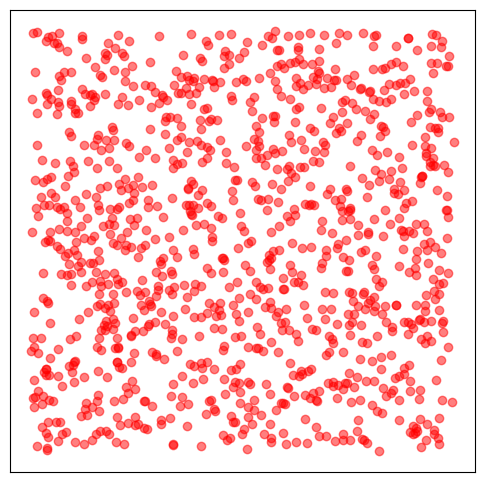

Defect Class fl:
  X - Min: 54.5, Max: 455.0
  Y - Min: 56.5, Max: 457.5


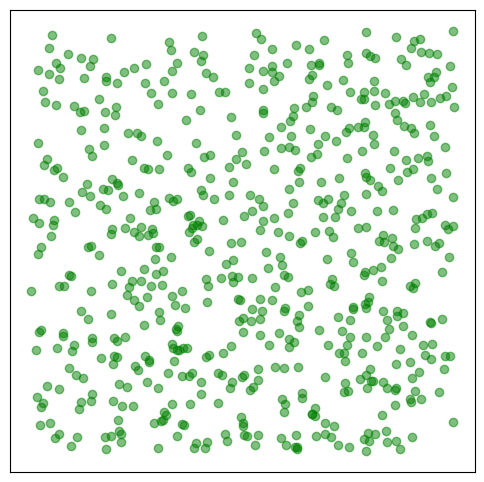

Defect Class st:
  X - Min: 54.5, Max: 457.5
  Y - Min: 52.5, Max: 458.5


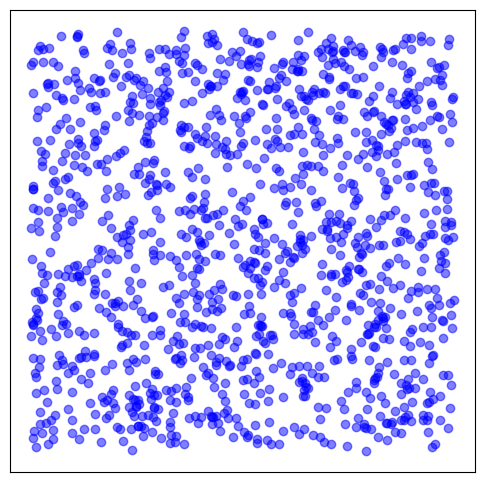

In [ ]:
## 이미지 내 결함 위치 파악

# 각 결함에 해당하는 바운딩 박스 정보를 저장할 리스트
bbox_info = {'aq': [], 'fl': [], 'st': []}

# 바운딩 박스로 중심 좌표 계산
for json_file in os.listdir(json_folder_path):
    if json_file.endswith('.json'):
        with open(os.path.join(json_folder_path, json_file), 'r') as f:
            data = json.load(f)
            defect_class = data['defect_class']
            if defect_class in bbox_info:
                top_x = data['top_x']
                top_y = data['top_y']
                bot_x = data['bot_x']
                bot_y = data['bot_y']
                center_x = (top_x + bot_x) / 2
                center_y = (top_y + bot_y) / 2
                bbox_info[defect_class].append((center_x, center_y))

# 시각화
colors = {'st': 'b', 'aq': 'r', 'fl': 'g'}

for defect, centers in bbox_info.items():
    if centers:
        x_coords, y_coords = zip(*centers)
        print(f"Defect Class {defect}:")
        print(f"  X - Min: {min(x_coords)}, Max: {max(x_coords)}")
        print(f"  Y - Min: {min(y_coords)}, Max: {max(y_coords)}")

    x_coords, y_coords = zip(*centers) if centers else ([], [])
    plt.figure(figsize=(6, 6))
    plt.scatter(x_coords, y_coords, label=f'Class {defect}', alpha=0.5, color=colors[defect])
    plt.xticks([])
    plt.yticks([])
    plt.show()

Defect Class aq:
  1st Quadrant: 275 defects
  2nd Quadrant: 267 defects
  3rd Quadrant: 281 defects
  4th Quadrant: 265 defects


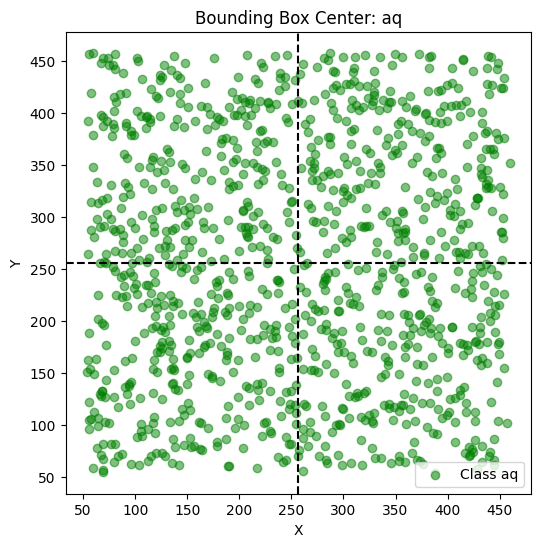

Defect Class fl:
  1st Quadrant: 172 defects
  2nd Quadrant: 133 defects
  3rd Quadrant: 153 defects
  4th Quadrant: 165 defects


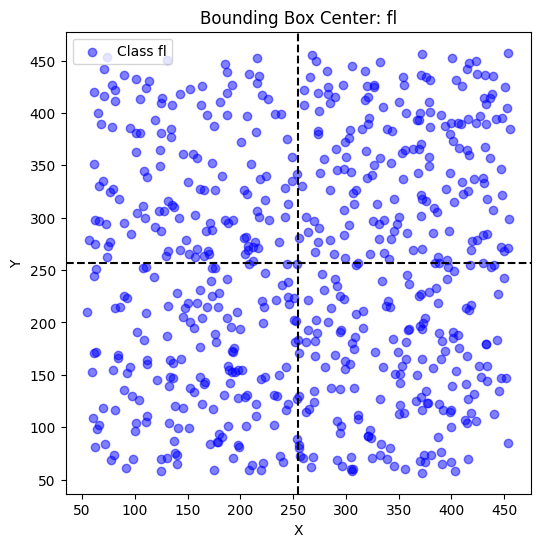

Defect Class st:
  1st Quadrant: 341 defects
  2nd Quadrant: 305 defects
  3rd Quadrant: 323 defects
  4th Quadrant: 320 defects


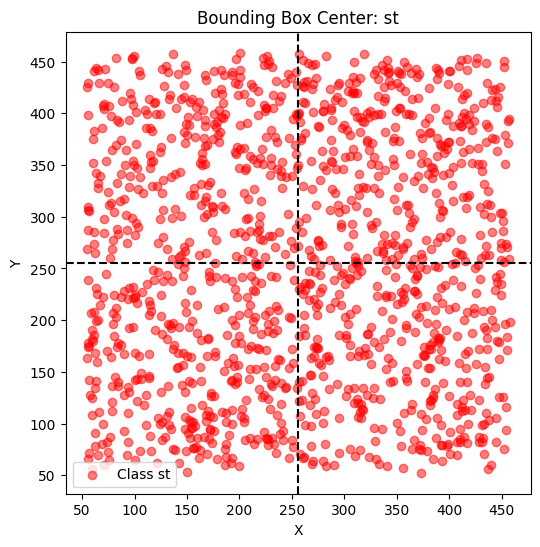

In [ ]:
## 사분면 기준으로 각 결함별 X와 Y의 중앙값 계산

for defect, centers in bbox_info.items():
    if centers:
        x_coords, y_coords = zip(*centers)
        x_mid = (min(x_coords) + max(x_coords)) / 2
        y_mid = (min(y_coords) + max(y_coords)) / 2

        # 사분면에 속하는 결함 개수 계산
        quadrants = [0, 0, 0, 0]  # 1사분면, 2사분면, 3사분면, 4사분면 순서
        for x, y in centers:
            if x >= x_mid and y >= y_mid:
                quadrants[0] += 1  # 1사분면
            elif x < x_mid and y >= y_mid:
                quadrants[1] += 1  # 2사분면
            elif x < x_mid and y < y_mid:
                quadrants[2] += 1  # 3사분면
            else:
                quadrants[3] += 1  # 4사분면

        # 사분면별 개수 출력
        print(f"Defect Class {defect}:")
        print(f"  1st Quadrant: {quadrants[0]} defects")
        print(f"  2nd Quadrant: {quadrants[1]} defects")
        print(f"  3rd Quadrant: {quadrants[2]} defects")
        print(f"  4th Quadrant: {quadrants[3]} defects")

        # 시각화:
        colors = {'st': 'r', 'aq': 'g', 'fl': 'b'}
        fig, ax = plt.subplots(figsize=(6, 6))

        x_coords, y_coords = zip(*centers) if centers else ([], [])
        ax.scatter(x_coords, y_coords, label=f'Class {defect}', alpha=0.5, color=colors[defect])

        # 중앙값을 기준으로 사분면 그리기
        ax.axhline(y=y_mid, color='black', linestyle='--')  # 중앙 수평선
        ax.axvline(x=x_mid, color='black', linestyle='--')  # 중앙 수직선

        ax.set_title(f'Bounding Box Center: {defect}')
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.legend()

        plt.show()

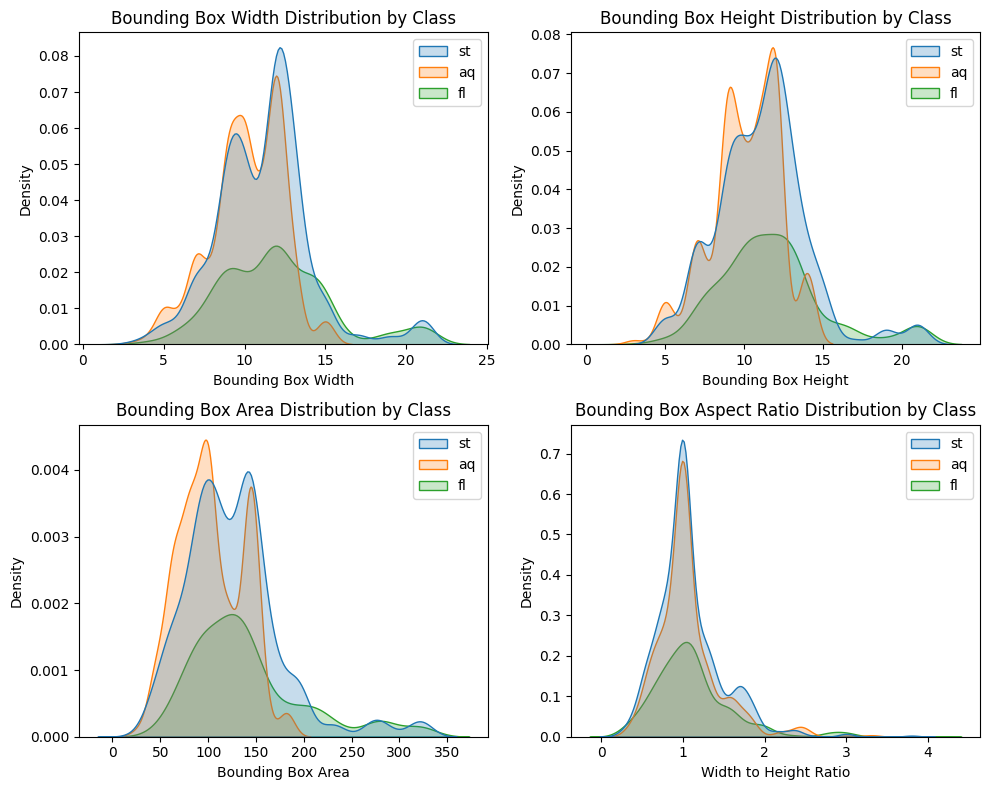

In [ ]:
## 바운딩 박스 크기와 비율 통계

bounding_box_data = {'st': [], 'aq': [], 'fl': []}

for json_file in os.listdir(json_folder_path):
    if json_file.endswith('.json'):
        json_path = os.path.join(json_folder_path, json_file)

        with open(json_path, 'r') as f:
            data = json.load(f)
            defect_class = data['defect_class']

            # 바운딩 박스 크기와 가로/세로 비율 계산
            width = data['bot_x'] - data['top_x']
            height = data['bot_y'] - data['top_y']
            area = width * height
            aspect_ratio = width / height if height != 0 else 0

            # 각 유형에 따라 데이터 저장
            if defect_class in bounding_box_data:
                bounding_box_data[defect_class].append({
                    'width': width,
                    'height': height,
                    'area': area,
                    'aspect_ratio': aspect_ratio
                })

# 데이터 합치기
widths = []
heights = []
areas = []
aspect_ratios = []
classes = []

for defect_class, data in bounding_box_data.items():
    for entry in data:
        widths.append(entry['width'])
        heights.append(entry['height'])
        areas.append(entry['area'])
        aspect_ratios.append(entry['aspect_ratio'])
        classes.append(defect_class)

# 그래프 그리기
fig, axs = plt.subplots(2, 2, figsize=(10,8))

# 가로 길이 분포
sns.kdeplot(x=widths, hue=classes, ax=axs[0, 0], fill=True)
axs[0, 0].set_title('Bounding Box Width Distribution by Class')
axs[0, 0].set_xlabel('Bounding Box Width')

# 세로 길이 분포
sns.kdeplot(x=heights, hue=classes, ax=axs[0, 1], fill=True)
axs[0, 1].set_title('Bounding Box Height Distribution by Class')
axs[0, 1].set_xlabel('Bounding Box Height')

# 넓이 분포
sns.kdeplot(x=areas, hue=classes, ax=axs[1, 0], fill=True)
axs[1, 0].set_title('Bounding Box Area Distribution by Class')
axs[1, 0].set_xlabel('Bounding Box Area')

# 가로/세로 비율 분포
sns.kdeplot(x=aspect_ratios, hue=classes, ax=axs[1, 1], fill=True)
axs[1, 1].set_title('Bounding Box Aspect Ratio Distribution by Class')
axs[1, 1].set_xlabel('Width to Height Ratio')

plt.tight_layout()
plt.show()

In [ ]:
## 각 결함 유형별로 이미지 추출 및 시각화

bbox_info = {'st': [], 'aq': [], 'fl': []}

# 바운딩 박스 X,Y좌표를 저장
for json_file in os.listdir(json_folder_path):
    if json_file.endswith('.json'):
        with open(os.path.join(json_folder_path, json_file), 'r') as f:
            data = json.load(f)
            defect_class = data['defect_class']
            if defect_class in bbox_info:
                image_name = data['image_name']
                top_x = data['top_x']
                top_y = data['top_y']
                bot_x = data['bot_x']
                bot_y = data['bot_y']
                bbox_info[defect_class].append((image_name, top_x, top_y, bot_x, bot_y))

num_per_row = 20

for defect, bboxes in bbox_info.items():
    num_rows = len(bboxes) // num_per_row + (1 if len(bboxes) % num_per_row != 0 else 0)  # 전체 행의 수 계산
    fig, axs = plt.subplots(num_rows, num_per_row, figsize=(20, 4 * num_rows))  # 전체 크기 설정
    fig.suptitle(f'Defects for Class: {defect}', fontsize=16)

    # 각 결함 이미지 처리
    for idx, bbox in enumerate(bboxes):
        image_name, top_x, top_y, bot_x, bot_y = bbox
        image_path = os.path.join(image_folder_path, image_name)

        image_number = image_name.split('_')[1].split('.')[0]
        img = Image.open(image_path)

        # 바운딩 박스 안의 결함 부분 잘라내기
        cropped_img = img.crop((top_x, top_y, bot_x, bot_y))

        row = idx // num_per_row
        col = idx % num_per_row

        # 시각화
        axs[row, col].imshow(cropped_img)
        axs[row, col].axis('off')
        axs[row, col].set_title(image_number, fontsize=8)

    # 남은 subplot을 비우기 (이미지 개수가 모자랄 경우)
    for j in range(len(bboxes), num_rows * num_per_row):
        row = j // num_per_row
        col = j % num_per_row
        axs[row, col].axis('off')

    plt.show()

Output hidden; open in https://colab.research.google.com to view.